# Analysis of Yelp Business Intelligence Data

##  Installation and Initial Setup

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark SQL basic example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

## Importing Packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Business Data

In [6]:
df = spark.read.json('s3://sta9760-practice-spark/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overvieing Data

In [7]:
# Overview of data
print(f'Columns: {len(df.dtypes)} | Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 209,393

In [8]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [9]:
df.select(df['business_id'], df['name'], df['city'], df['state'], df['stars'], df['categories']).show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+-----+--------------------+
|         business_id|                name|           city|state|stars|          categories|
+--------------------+--------------------+---------------+-----+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|  3.5|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|  5.0|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|  5.0|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|  2.5|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|  4.5|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+-----+--------------------+
only showing top 5 rows

## Analyzing Categories

- Association Table
- Total Categories
- Unique Numbers of Category
- Top 20 Popular Categories

## Association Table

In [10]:
#Association Table
df.createOrReplaceTempView('business')
sqldf = spark.sql(
'''
SELECT *, EXPLODE(SPLIT(categories,', ')) AS category 
FROM business
''')
sqldf.createOrReplaceTempView("category")
association = spark.sql(
'''SELECT business_id, category 
FROM category 
LIMIT 5
'''
)
association.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+

## Total Number in Active Life

In [11]:
#Total Categories
cat_activelife = spark.sql(
'''SELECT category, COUNT(*) AS number
FROM category
WHERE category = 'Active Life'
GROUP BY category''')
cat_activelife.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------+
|   category|number|
+-----------+------+
|Active Life| 10225|
+-----------+------+

## Total Unique Categories

In [12]:
# numbers of unique categories
uni_cat_count = spark.sql(
'''SELECT COUNT(DISTINCT category) as unique_category
FROM category''')
uni_cat_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+
|unique_category|
+---------------+
|           1336|
+---------------+

## Top Categories By Business

In [13]:
# Top 20 Categories By Business

top_20_cat = spark.sql(
'''SELECT category, COUNT(*) AS count
FROM category
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20''')
top_20_cat.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|63944|
|            Shopping|34644|
|                Food|32991|
|       Home Services|22487|
|       Beauty & Spas|20520|
|    Health & Medical|19227|
|      Local Services|15783|
|          Automotive|14720|
|           Nightlife|14211|
|                Bars|12400|
|Event Planning & ...|11263|
|         Active Life|10225|
|        Coffee & Tea| 8415|
|             Fashion| 8374|
|           Fast Food| 8106|
|          Sandwiches| 8064|
|American (Traditi...| 7596|
|       Home & Garden| 7331|
|         Hair Salons| 7303|
|               Pizza| 7302|
+--------------------+-----+

### Bar Chart of Top Categories

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

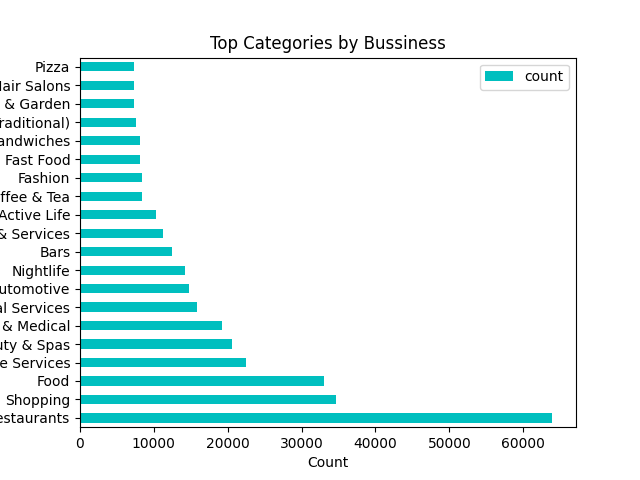

In [14]:
top_20_cat.toPandas().plot.barh(y = 'count', x = 'category',title = 'Top Categories by Bussiness', color = 'c').set(xlabel="Count", ylabel = 'Category')

%matplot plt

# Do Yelp Reviews Skew Negative?

## Loading Review Data

In [15]:
# Loading Data
df_re = spark.read.json('s3://sta9760-practice-spark/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
df_re.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [17]:
df[df['business_id'], df['stars']].show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|f9NumwFMBDn751xgF...|  3.5|
|Yzvjg0SayhoZgCljU...|  5.0|
|XNoUzKckATkOD1hP6...|  5.0|
|6OAZjbxqM5ol29BuH...|  2.5|
|51M2Kk903DFYI6gnB...|  4.5|
+--------------------+-----+
only showing top 5 rows

## Rating by users who took the time to submit a written review

#### Users who didn't write text in their review

In [18]:
# Rating by users who took the time to submit a written review
df_re.createOrReplaceTempView('review')

do_re_rating = spark.sql(
'''SELECT business_id, AVG(stars) AS avg_stars
FROM review
WHERE text IS NOT NULL
GROUP BY 1''')

do_re_rating.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avg_stars|
+--------------------+------------------+
|ATeOjZzE3VOI-RW7F...| 3.433734939759036|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vbUABNAQI2iwN7v0x...|2.4545454545454546|
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

In [19]:
do_re_rating.createOrReplaceTempView("nReview")
review_business = spark.sql(
'''SELECT *
FROM business b
JOIN nReview r
ON b.business_id = r.business_id''')
review_business.createOrReplaceTempView("review_business")

join_rb = spark.sql('''
SELECT avg_stars, stars, name, city, state
FROM review_business
ORDER BY 1 DESC
''')
join_rb.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+--------------------+---------+-----+
|avg_stars|stars|                name|     city|state|
+---------+-----+--------------------+---------+-----+
|      5.0|  5.0|Mike's Mobile Aut...|  Gilbert|   AZ|
|      5.0|  5.0|   RateWise Mortgage|Las Vegas|   NV|
|      5.0|  5.0|Amanda B. Wedding...|Las Vegas|   NV|
|      5.0|  5.0|Schiffman Law Off...|  Phoenix|   AZ|
|      5.0|  5.0|     Chillout Lounge|Henderson|   NV|
+---------+-----+--------------------+---------+-----+
only showing top 5 rows

In [20]:
# calculate the skewness
join_rb.createOrReplaceTempView("join_table")

skew = spark.sql(
'''SELECT (avg_stars - stars)/ stars AS skew
FROM join_table
''')

skew.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+
|skew|
+----+
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
| 0.0|
+----+
only showing top 10 rows

#### Outcome: Normal Distribution

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

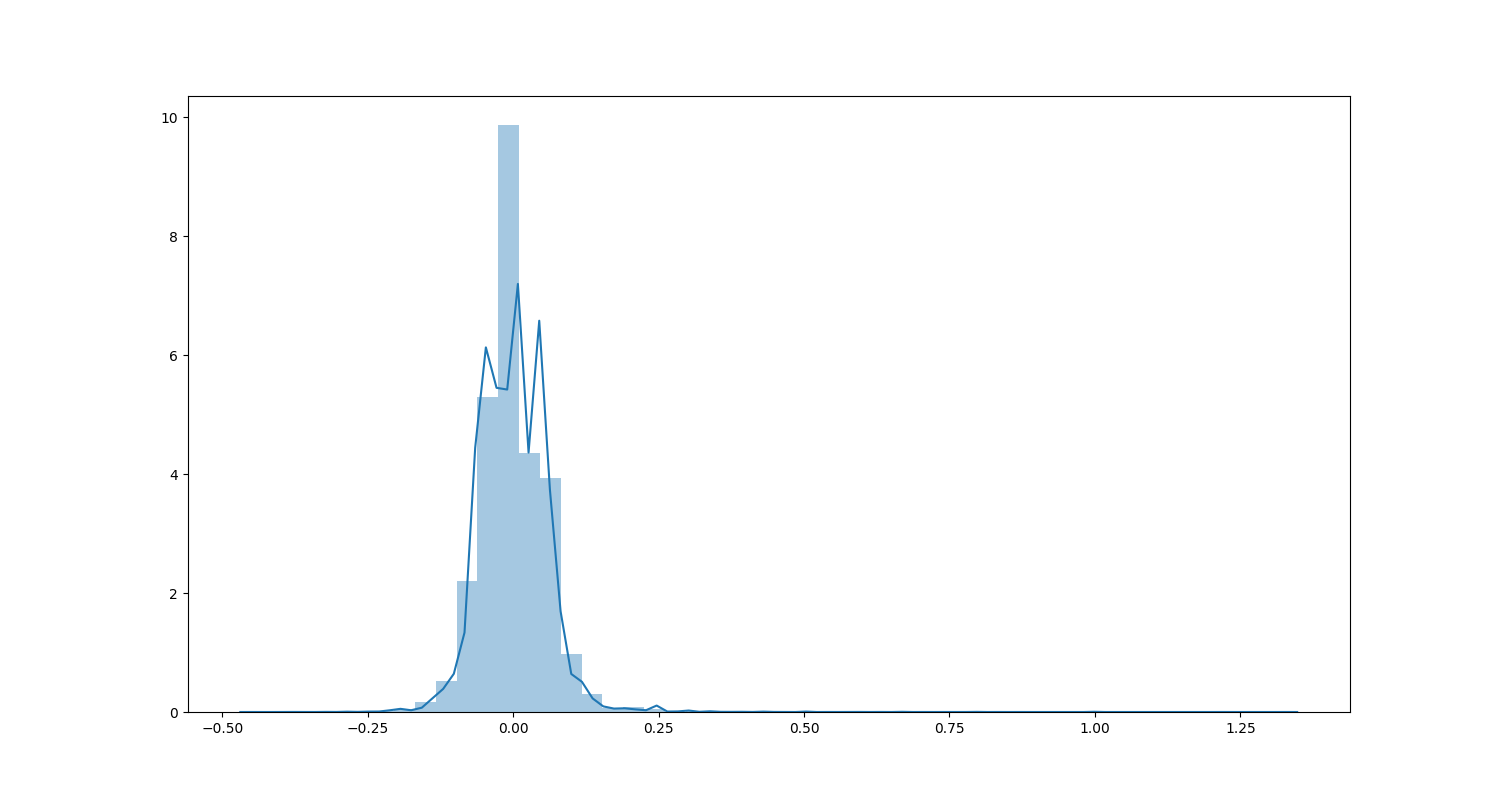

In [21]:
skew = skew.toPandas()
fig = plt.figure(figsize=(15,8))
plot= sns.distplot(skew)

%matplot plt

# Should the Elite be Trusted?

## Loading User Data

In [22]:
df_u = spark.read.json('s3://sta9760-practice-spark/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
df_u.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

## Average Fan increase per review

In [77]:
df_u.createOrReplaceTempView("user")

user = spark.sql('''
SELECT SUM(fans)/ SUM(review_count) AS fans_increase_per_review
FROM user''')
user.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------+
|fan_increase_per_review|
+-----------------------+
|    0.06580379113050557|
+-----------------------+

### Number of Elite

In [76]:
# join tables user & review
# numbr of elite users

temp = spark.sql('''
SELECT COUNT(*) AS numb_of_elite
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite LIKE '20%'
''')

temp.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+
|numb_of_elite|
+-------------+
|      1756327|
+-------------+

## Elite, Normal Who is more picky?

In [78]:
temp1 = spark.sql('''
SELECT SUM(average_stars)/ COUNT(*) AS avgstars_elite
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite LIKE '20%'
''')

temp1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+
|   avgstars_elite|
+-----------------+
|3.854129919997809|
+-----------------+

In [80]:
temp2 = spark.sql('''
SELECT SUM(average_stars)/ COUNT(*) AS avgstars_normal
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite NOT LIKE '20%'
''')

temp2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+
|   avgstars_normal|
+------------------+
|3.6883151483807723|
+------------------+

In [65]:
df_e = spark.sql('''
SELECT r.business_id, AVG(r.stars) AS elite_avg_star
FROM user u
JOIN review r
ON u.user_id = r.user_id
WHERE elite LIKE '20%'
GROUP BY 1
''')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Calculate the Difference between Elite's rating & Normal's rating

In [66]:
df_e.createOrReplaceTempView("elite_user")
do_re_rating.createOrReplaceTempView("general")

diff = spark.sql('''
SELECT (elite_avg_star - avg_stars) AS diff
FROM elite_user e
JOIN general g
ON e.business_id = g.business_id
ORDER BY 1 DESC''')

diff.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+
|              diff|
+------------------+
|               3.8|
|3.6944444444444446|
| 3.666666666666667|
|3.6363636363636367|
| 3.619047619047619|
|3.6153846153846154|
|               3.6|
|               3.6|
|               3.6|
|               3.6|
|3.5806451612903225|
| 3.571428571428571|
|3.5666666666666664|
|3.5555555555555554|
|3.5454545454545454|
|3.5454545454545454|
| 3.533333333333333|
|3.5306122448979593|
|3.5294117647058822|
| 3.526315789473684|
+------------------+
only showing top 20 rows

In [68]:
diff_rev = spark.sql('''
SELECT (elite_avg_star - avg_stars) AS diff
FROM elite_user e
JOIN general g
ON e.business_id = g.business_id
ORDER BY 1 ''')
diff_rev.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|               diff|
+-------------------+
|              -3.84|
|              -3.84|
|               -3.8|
|-3.7894736842105265|
| -3.764705882352941|
|              -3.75|
|              -3.75|
| -3.735294117647059|
|-3.7222222222222223|
|-3.6923076923076925|
|-3.6842105263157894|
| -3.666666666666667|
| -3.666666666666667|
| -3.666666666666667|
|-3.6521739130434785|
|-3.6428571428571432|
|-3.6363636363636367|
|-3.6363636363636367|
|-3.6315789473684212|
|-3.6111111111111107|
+-------------------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

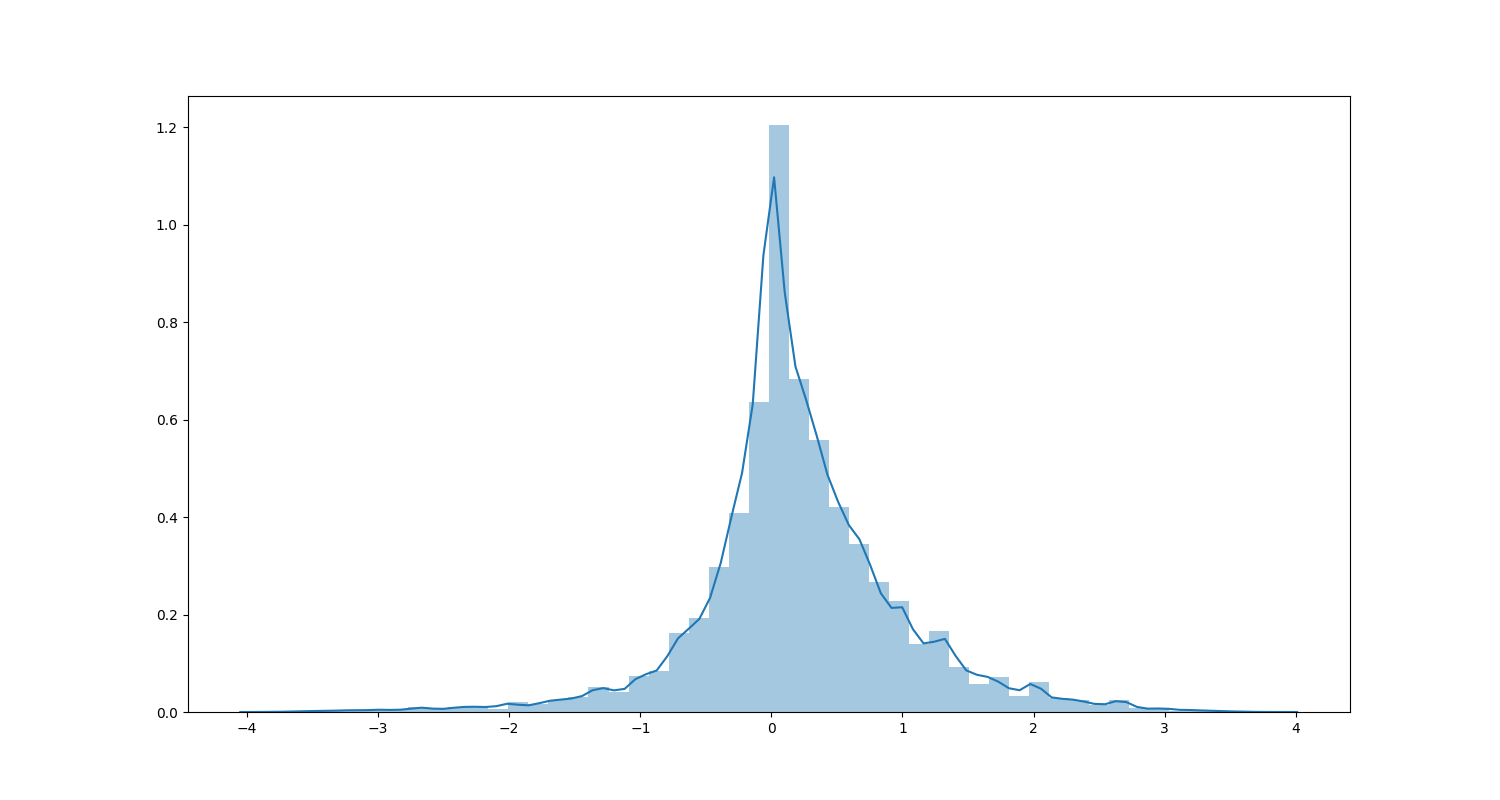

In [75]:
diff = diff.toPandas()
fig = plt.figure(figsize=(15,8))
plot= sns.distplot(diff)

%matplot plt

### Normal seems to be more picky! 
###### My explanation: elite user may have more connection with the business, they are more likely to recieve free/ discount service. 
###### Conclustion: Should be trusted, but we can automatically deduct a little on their rating 

In [81]:
print(diff.describe())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                diff
count  148225.000000
mean        0.211925
std         0.761830
min        -3.840000
25%        -0.133333
50%         0.125000
75%         0.566667
max         3.800000